Matteo Tortora, PhD Student, m.tortora@unicampus.it

## Overview

In this tutorial, we will cover:
* Introduction to spatial filtering;
* Smoothing filters;
* Correlation
* Now it's your turn

## Introduction to filter

Spatial filtering modifies an image by replacing the value of
each pixel by a function of the values of the pixel and its
neighbors. 
Filters are used to **extract** useful **information** from images or to **enhance** some of their properties (e.g. denoising, sharpening, smoothing).

There are two types of filters:
1. Linear spatial filters: the operation performed on the image pixels
is linear
2. Nonlinear spatial filters: otherwise

In linear filters the output is a linear combination of the input pixels; the coefficients are defined by a mask.

If we have a linear, translation-invariant (LSI) filter, characterized by the impulse response $h(m, n)$, the response $g(m,n)$ of the filter can be obtained from the convolution product:

$g(x,y) = f(x,y)*w(x,y)$

where $w(x,y)$ is named as **mask**.

## Smoothing filters



Smooting filters are used to enanche the image quality, decreasing the local contrast of the image. 
They are used to perform **blurring** and **noise reduction** operations. **Blurring** is a technique used for:
* Removing small objects or details;
* Joining small gaps in lines and curves.

Image blurring is achieved by convolving the image with a low-pass filter kernel. 
It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. Today, we will see 3 types of blurring techniques implemented by OpenCV:
1. Averaging filter
2. Gausian filter
3. Median filter



Let's see the **averaging** filter (also known as **box filter**).

This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. In OpenCV, this is done by the function `cv2.blur()`. 
Let's see its syntax:

`cv2.blur(src, ksize)`:

* *src*: input image;
* *ksize*: kernel size.

A 3x3 normalized box filter would look like this:

$K = \frac{1}{9}  
\begin{bmatrix}
 1&1&1\\
 1&1&1\\
 1&1&1
 \end{bmatrix} $

It's used to remove noise, which is characterised by abrupt grey variations. Furthermore, it's also used to remove false contouring.

Negative effect: makes edges less noticeable.

(-0.5, 1303.5, 1439.5, -0.5)

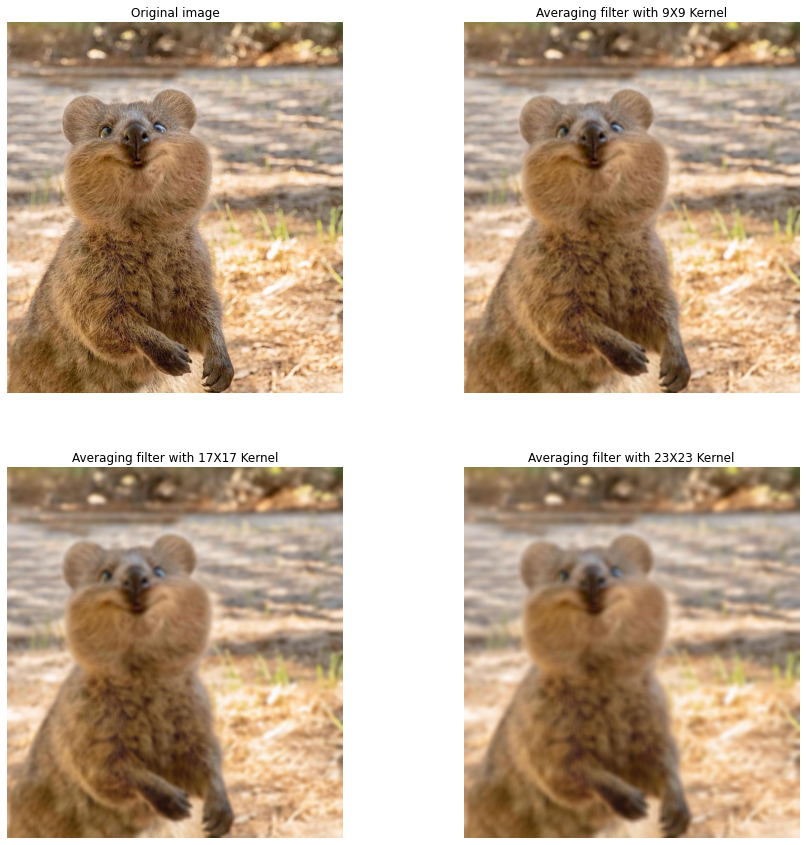

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('quokka.png', 1) # read the image in BGR mod.

# Now we apply Box filter with three diferente kernel size
img_bgr_blur_9 = cv2.blur(img_bgr, (9,9)) # apply 
img_bgr_blur_17 = cv2.blur(img_bgr, (17,17))
img_bgr_blur_23 = cv2.blur(img_bgr, (23,23))

# Let's plot the effect of the variation in kernel size.
f = plt.figure(figsize=(15,15))

# As I said in the previous lab class, OpenCv read coloured images with the BGR convention, 
# but matplot library works with the RGB convention. So, let's put the channels in the right order.
f.add_subplot(2, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Averaging filter with 9X9 Kernel')
plt.imshow(cv2.cvtColor(img_bgr_blur_9, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('Averaging filter with 17X17 Kernel')
plt.imshow(cv2.cvtColor(img_bgr_blur_17, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Averaging filter with 23X23 Kernel')
plt.imshow(cv2.cvtColor(img_bgr_blur_23, cv2.COLOR_BGR2RGB))
plt.axis('off')

# We can see how enlarging the kernel size increases the blurring effect. 

Let's see the **Gaussian** filter.

In this approach, instead of a kernel consisting of equal coefficients, a Gaussian kernel is used.

In the following an example of Gaussian kernel:

$K = 
\begin{bmatrix}
 0&1&2&1&0\\
 1&3&5&3&1\\
 2&5&9&5&2 \\
 1&3&5&3&1\\
0&1&2&1&0 \\
 \end{bmatrix} $

**The values of a Gaussian kernel follows the values of a Gaussian distribution.** So, central pixel receives the highest weight (centred on the Gaussian).

Gaussian filtering is highly effective in removing Gaussian noise from the image. In addition, unlike the averaging filter, it's a edge-preserving blurring filter.

OpenCV implements `cv2.GaussianBlur()` function to apply a Gaussian filter. Let's see its syntax.

`cv2.GaussianBlur(src, ksize, sigmaX)`:

* *src*: input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* *ksize*: Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
* *sigmaX*: Gaussian kernel standard deviation in X direction.

Finally, you can use `cv2.getGaussianKernel()` to get Gaussian coefficients of the kernel.


(-0.5, 1303.5, 1439.5, -0.5)

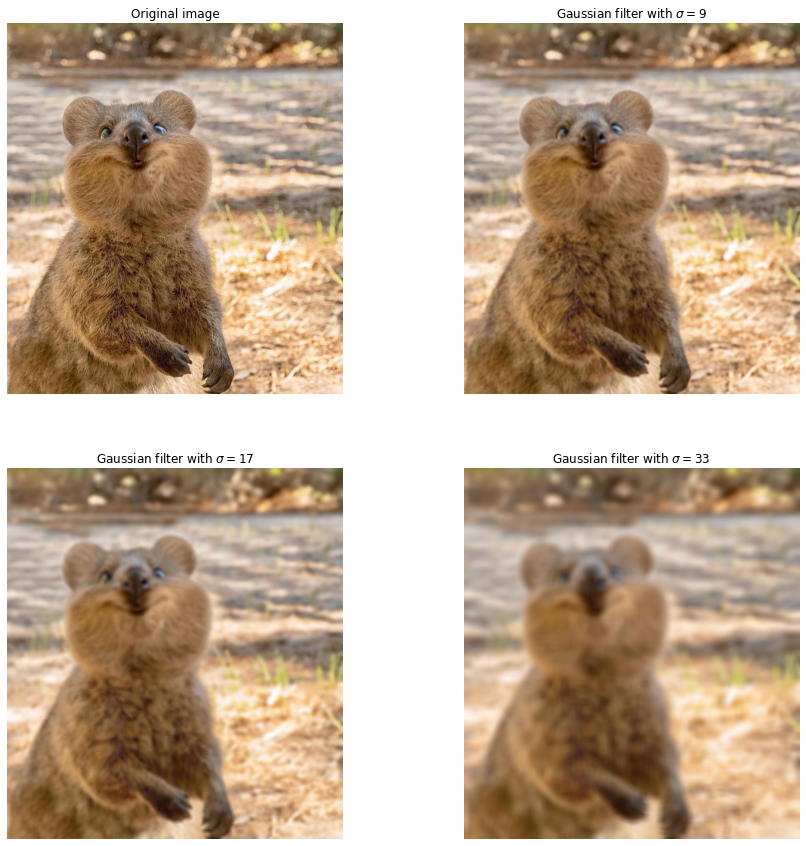

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('quokka.png', 1) # read the image in BGR mod.

# Let's apply the Gaussian filter with different kernel sizes and standard deviations
img_bgr_gauss_9 = cv2.GaussianBlur(img_bgr, (9,9), 9)
img_bgr_gauss_17 = cv2.GaussianBlur(img_bgr, (17,17), 17)
img_bgr_gauss_33 = cv2.GaussianBlur(img_bgr, (33,33), 33)

f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Gaussian filter with $\sigma=9$')
plt.imshow(cv2.cvtColor(img_bgr_gauss_9, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('Gaussian filter with $\sigma=17$')
plt.imshow(cv2.cvtColor(img_bgr_gauss_17, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Gaussian filter with $\sigma=33$')
plt.imshow(cv2.cvtColor(img_bgr_gauss_33, cv2.COLOR_BGR2RGB))
plt.axis('off')

Finally, let's see the **median** filter.

Here, the function `cv2.medianBlur()` computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. Let's see the syntax of this function:

`cv2.medianBlur(src, ksize)`:

* *src*: input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* *ksize*: 	blurring kernel size.

As you have seen in class, the median filter is not applied through the convolution operation as it is a non-linear filter.

This is highly effective in removing salt-and-pepper noise.

(-0.5, 1303.5, 1439.5, -0.5)

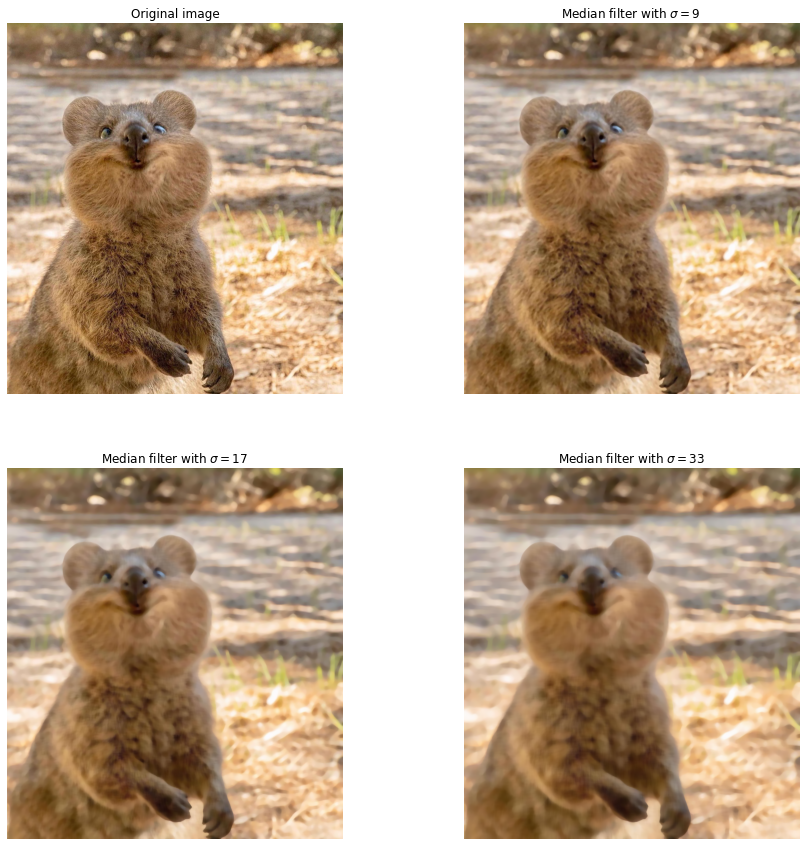

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('quokka.png', 1) # read the image in BGR mod.

# Let's apply the Median filter with different kernel size
img_bgr_median_9 = cv2.medianBlur(img_bgr, 9)
img_bgr_median_17 = cv2.medianBlur(img_bgr, 17)
img_bgr_median_23 = cv2.medianBlur(img_bgr, 23)


f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Median filter with $\sigma = 9$ ')
plt.imshow(cv2.cvtColor(img_bgr_median_9, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('Median filter with $\sigma = 17$')
plt.imshow(cv2.cvtColor(img_bgr_median_17, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Median filter with $\sigma = 33$')
plt.imshow(cv2.cvtColor(img_bgr_median_23, cv2.COLOR_BGR2RGB))
plt.axis('off')

**Noise**

Now, we will see two types of noise:

* **Gaussian noise** it's a statistical noise, its value are distribuited following a Gaussian distribution:

$f\left(z\right)=\frac{1}{\sigma\sqrt{2 \pi }} e^{-\frac{1}{2}\left ( \frac{x-\mu}{\sigma} \right )^2}$


where $z$ represents the grey level, $\mu$  the mean grey value and $\sigma$  its standard deviation.
* **Salt-and-pepper noise**, also known as impulse noise, is a form of noise sometimes seen on images. An effective noise reduction method for this type of noise is a median filter. This consists of randomly making the pixels of the original image black or white.

Let's create a function that adds salt-and-pepper noise to the image with a probability of *prob*.

In [ ]:
import random
import numpy as np

def gaussian_noise(image, mean=0, var=0.1):
  '''
  Add Gaussian noise to image
  mean: mean of the Gaussian distribution
  var: variance of Gaussian the noise
  '''
  sigma = var**0.5
  
  image = cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
  # Since, guassian noise defined by gauss variable is in the range [0, 1], we also
  # normalize the original image in this range.

  ndim = image.ndim
  if ndim == 2: # if we have a grayscale image
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row,col)) 

    gauss = gauss.reshape(row, col) # we create a mask of Gaussian
    # noise with the same size of the original image.

  else: # if we have a RGB image
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch) # we create a mask of Gaussian
    # noise with the same size of the original image.

  img_noisy = cv2.add(image, gauss) # now we add the Gaussian noise mask directly onto the original image. 
  img_noisy = cv2.normalize(img_noisy, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # finally, we normalise the image again in the range [0, 255].
  return img_noisy


def sp_noise(image, prob):
  '''
  Add salt and pepper noise to image
  prob: Probability of the noise
  '''
  # get the size of the original image
  ndim = image.ndim
  if ndim == 2: # if we have a grayscale image
    row, col = image.shape
  else:
    row, col, _ = image.shape

  img_noisy = np.copy(image) # copy the original image in a new variable

  thres = 1 - prob 
  # thres and prob are two variables used to choose between salt or pepper noise, respectively.
  
  # we use two for cycles to iterate over all the pixels in the image.
  # For each pixel, we use the two variables thres and prob to choose whether 
  # to make it black, white or leave it unchanged.
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      rdn = random.random()
      if rdn < prob:
        # Pepper mode
        if ndim == 2:
          img_noisy[i][j] = 0 # add black pixel
        else:
          img_noisy[i][j] = [0, 0, 0] # add black pixel
      elif rdn > thres:
        # Salt mode
        if ndim == 2:
          img_noisy[i][j] = 255 # add white pixel
        else:
          img_noisy[i][j] = [255, 255, 255] # add white pixel
          
  return img_noisy

Let's now add some Gaussian and salt-and-pepper noise.

First we add some Gaussian noise to our picture.

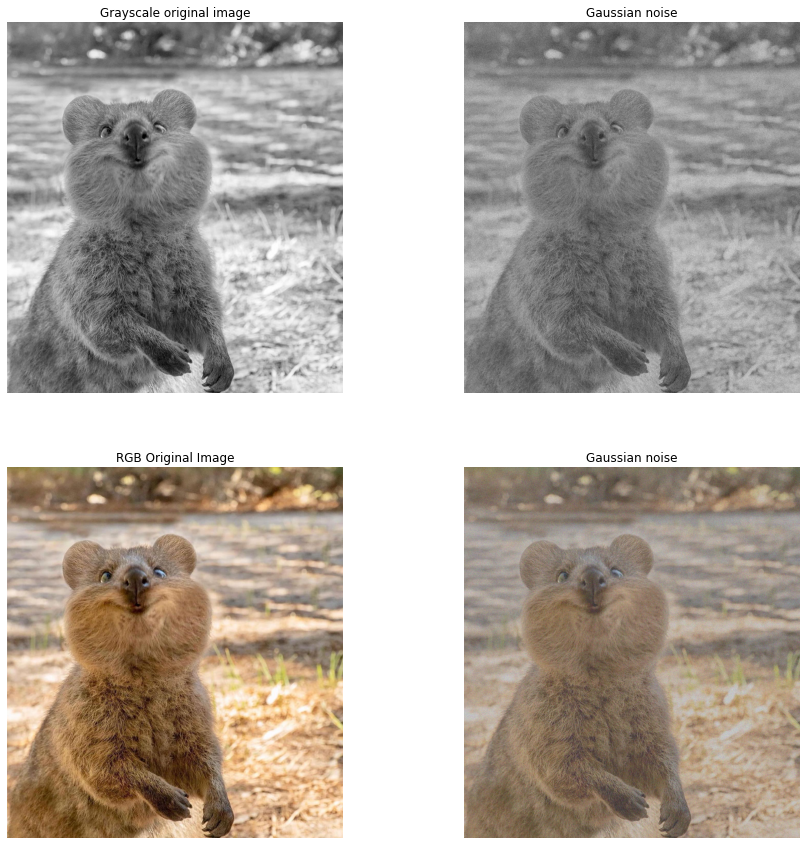

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_gs = cv2.imread('quokka.png', 0) # read the image in grayscale mod.
img_bgr = cv2.imread('quokka.png', 1) # read the image in BGR mod.

img_gs_gn = gaussian_noise(img_gs, mean=0, var=0.01)
img_bgr_gn = gaussian_noise(img_bgr, mean=0, var=0.01)

f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Grayscale original image')
plt.imshow(img_gs, cmap='gray')
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Gaussian noise')
plt.imshow(img_gs_gn, cmap='gray')
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('RGB Original Image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Gaussian noise')
plt.imshow(cv2.cvtColor(img_bgr_gn, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Then, let's add some salt-and-pepper noise to our image.

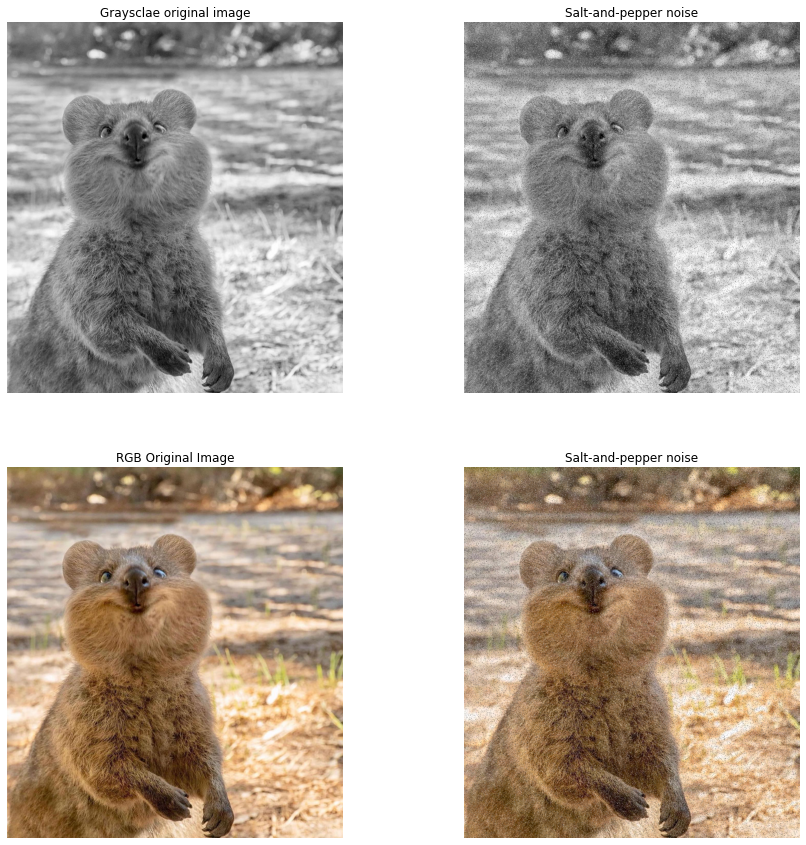

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_gs = cv2.imread('quokka.png', 0) # read the image in grayscale mod.
img_bgr = cv2.imread('quokka.png', 1) # read the image in BGR mod.

img_gs_sp = sp_noise(img_gs, 0.05)
img_bgr_sp = sp_noise(img_bgr, 0.05)

f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Graysclae original image')
plt.imshow(img_gs, cmap='gray')
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Salt-and-pepper noise')
plt.imshow(img_gs_sp, cmap='gray')
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('RGB Original Image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Salt-and-pepper noise')
plt.imshow(cv2.cvtColor(img_bgr_sp, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Now let's see how the filters we have just seen perform in eliminating these two types of noise.



(-0.5, 1303.5, 1439.5, -0.5)

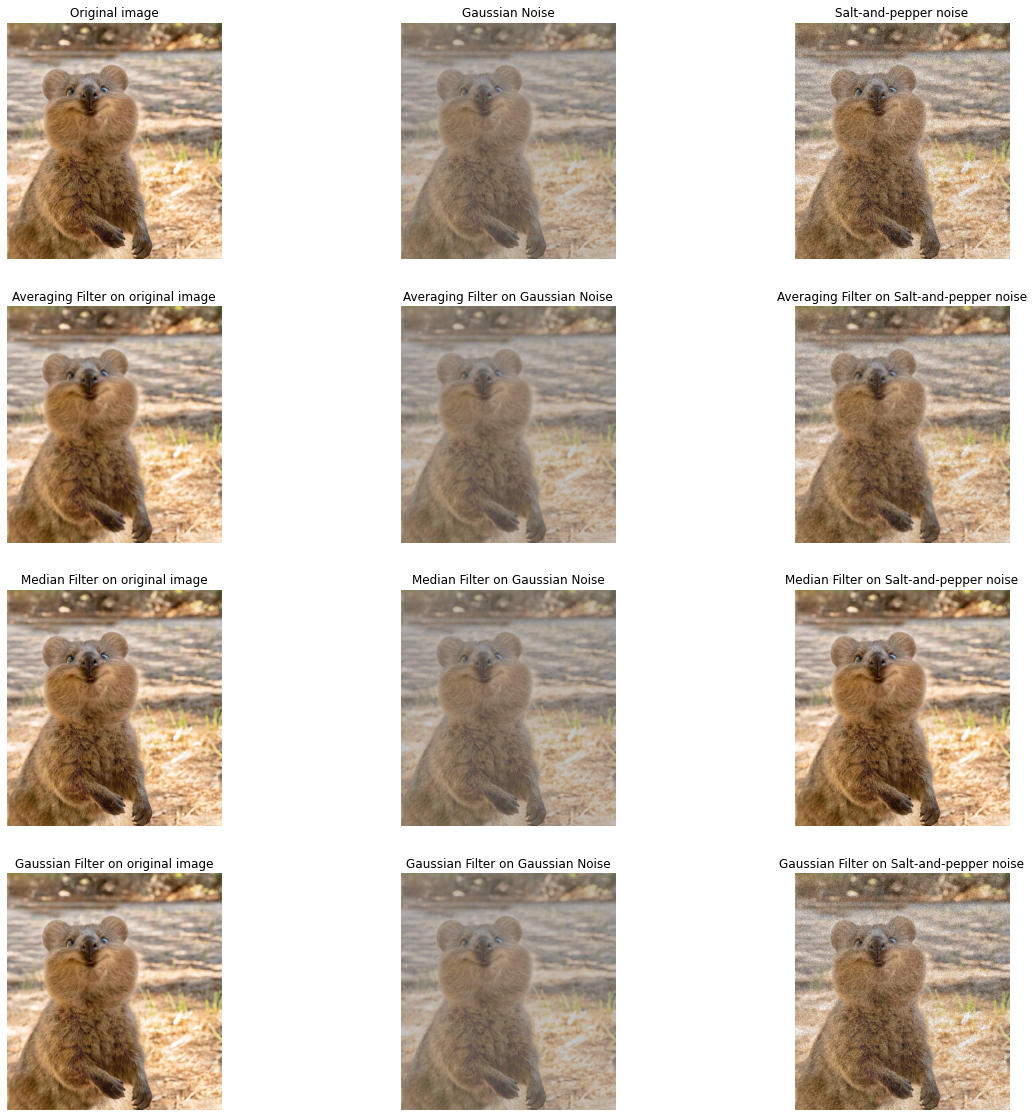

In [ ]:
img_bgr = cv2.imread('quokka.png', 1) # load the image in BGR mod.
img_bgr_gn = gaussian_noise(img_bgr, mean=0, var=0.01) # add some Gaussian noise
img_bgr_gn = cv2.normalize(img_bgr_gn, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img_bgr_sp = sp_noise(img_bgr, 0.1) # add some salt-and-pepper noise


f = plt.figure(figsize=(20,20))

f.add_subplot(4, 3, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 2).set_title('Gaussian Noise')
plt.imshow(cv2.cvtColor(img_bgr_gn, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 3).set_title('Salt-and-pepper noise')
plt.imshow(cv2.cvtColor(img_bgr_sp, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Averaging Filter
img_bgr_af = cv2.blur(img_bgr, (9,9))
img_bgr_gn_af = cv2.blur(img_bgr_gn, (9,9))
img_bgr_sp_af = cv2.blur(img_bgr_sp, (9,9))

f.add_subplot(4, 3, 4).set_title('Averaging Filter on original image')
plt.imshow(cv2.cvtColor(img_bgr_af, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 5).set_title('Averaging Filter on Gaussian Noise')
plt.imshow(cv2.cvtColor(img_bgr_gn_af, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 6).set_title('Averaging Filter on Salt-and-pepper noise')
plt.imshow(cv2.cvtColor(img_bgr_sp_af, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Median Filter
img_bgr_mf = cv2.medianBlur(img_bgr, 3)
img_bgr_gn_mf = cv2.medianBlur(img_bgr_gn, 3)
img_bgr_sp_mf = cv2.medianBlur(img_bgr_sp, 3)

f.add_subplot(4, 3, 7).set_title('Median Filter on original image')
plt.imshow(cv2.cvtColor(img_bgr_mf, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 8).set_title('Median Filter on Gaussian Noise')
plt.imshow(cv2.cvtColor(img_bgr_gn_mf, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 9).set_title('Median Filter on Salt-and-pepper noise')
plt.imshow(cv2.cvtColor(img_bgr_sp_mf, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Gaussian Filter
img_bgr_gf = cv2.GaussianBlur(img_bgr, (5,5), 1)
img_bgr_gn_gf = cv2.GaussianBlur(img_bgr_gn, (5,5), 1)
img_bgr_sp_gf = cv2.GaussianBlur(img_bgr_sp, (5,5), 1)

f.add_subplot(4, 3, 10).set_title('Gaussian Filter on original image')
plt.imshow(cv2.cvtColor(img_bgr_gf, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 11).set_title('Gaussian Filter on Gaussian Noise')
plt.imshow(cv2.cvtColor(img_bgr_gn_gf, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(4, 3, 12).set_title('Gaussian Filter on Salt-and-pepper noise')
plt.imshow(cv2.cvtColor(img_bgr_sp_gf, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Correlation

While the **convolution** is a filtering operation that expresses the amount of
overlap of one function as it is shifted over another function, the **correlation** compute the similiraty between two signals. Indeed, the correlation result reaches a maximum when the two signals best match. 

Key concepts:
1. Correlation has no kernel rotation;
2. When the kernel is symmetric about its center, the correlation and convolution outputs are the same.

(-0.5, 60.5, 60.5, -0.5)

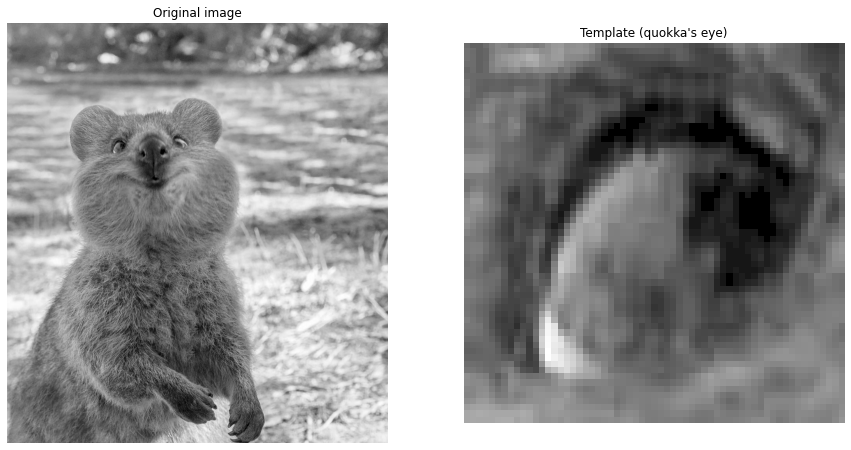

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
import cv2
import numpy as np

img = cv2.imread('quokka.png', 0) # load a grayscale image
template = img[395:456, 352:413] # select the quokka's eye

f = plt.figure(figsize=(15,15))

# Plot Original Image
f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Plot Template
f.add_subplot(1, 2, 2).set_title('Template (quokka\'s eye)')
plt.imshow(template, cmap='gray')
plt.axis('off')

Let's apply correlation using the selected template.
OpenCV comes with `cv2.matchTemplate()` function for this purpose.

(-0.5, 1243.5, 1379.5, -0.5)

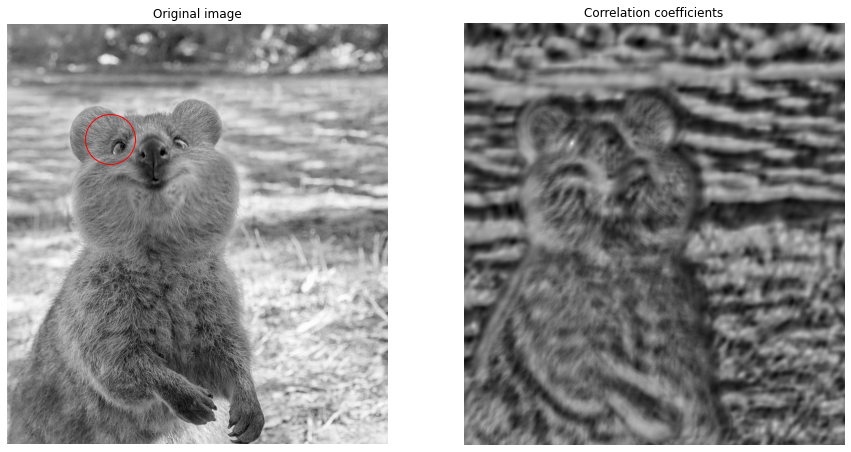

In [ ]:
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
# In this case we are applying the normalised cross-correlation operator, defined by
# cv2.TM_CCOEFF_NORMED parameter.

ij = np.unravel_index(np.argmax(result), result.shape) # this method converts a flat 
# index or array of flat indices into a tuple of coordinate arrays.
x, y = ij[::-1] # we are simply inverting the order of the elements of the tuple defined by the variable ij.

f = plt.figure(figsize=(15,15))

# Plot Original Image
f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(img, cmap='gray')
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=50)
plt.axis('off')

# Plot correlation coefficients
f.add_subplot(1, 2, 2).set_title('Correlation coefficients')
plt.imshow(result, cmap='gray')
plt.axis('off')

On the right we can see the coefficients obtained from the correlation operator applied to the original image and using a patch containing the eye of the quokka as a template.

As we mentioned above, the correlation operator computes the similarity between two signals. Thus, the correlation coefficients reach a maximum when the two signals correspond best.

Hence, as can be seen from the image on the right, the coefficients with the highest values (whitest pixels) are in fact positioned close to the quokka's eye.

On the left, we have highlighted with a red rectangle above the original image the point whose coordinates correspond to the whitest pixel of the coefficients' image on the right.

## Now it's your turn

Remove the watermark from the following images.

(-0.5, 1798.5, 1124.5, -0.5)

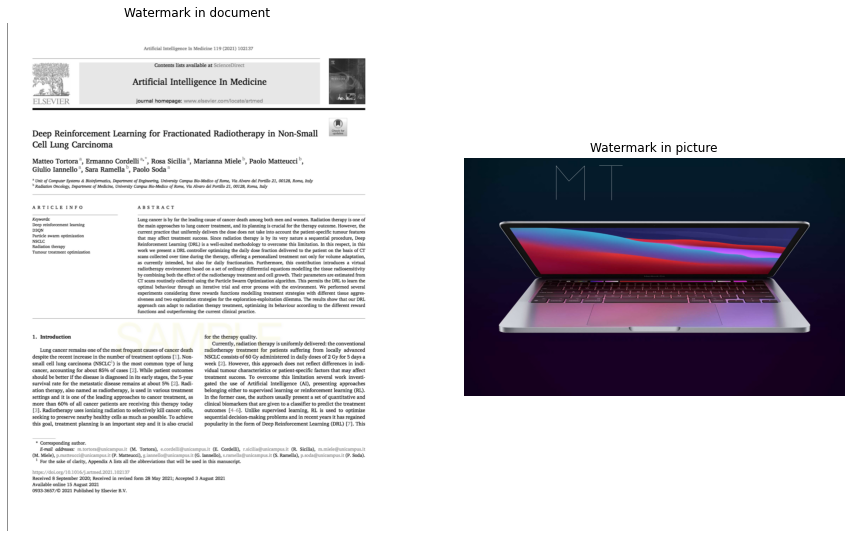

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_1 = cv2.imread('sample_text.png', 1) # load the image in BGR mod.
img_2 = cv2.imread('macbookpro.png', 1) # load the image in BGR mod.

# Plot images
f = plt.figure(figsize=(15,15))

f.add_subplot(1, 2, 1).set_title('Watermark in document')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(1, 2, 2).set_title('Watermark in picture')
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.axis('off')